## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
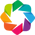

In [2]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and then combines them to a single network to work with).

In [225]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
#attributes.set_index('id',inplace=True)
attributes.drop("id", axis=1, inplace=True) # The ID cannot be used for index, because the actual node ID's are re-indexed to 0, I prefer to just keep the index as ID


cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

Initial inspection:

In [186]:
print(nx.get_node_attributes(G_friendship, 'seniority')) 

{0: 'Partner', 1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Associate', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Assoc

In [181]:
G_friendship.nodes


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70))

In [5]:
print(nx.info(G_friendship))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 575
Average in degree:   8.0986
Average out degree:   8.0986


In [6]:
print(nx.info(G_advice))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 892
Average in degree:  12.5634
Average out degree:  12.5634


In [7]:
print(nx.info(G_work))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 756
Average in degree:  10.6479
Average out degree:  10.6479


In [214]:
attributes.head()

seniority gender    office  tenure  age    practice         school
0   Partner   Male    Boston      31   64  Litigation  Harvard, Yale
1   Partner   Male    Boston      32   62   Corporate  Harvard, Yale
2   Partner   Male  Hartford      13   67  Litigation  Harvard, Yale
3   Partner   Male    Boston      31   59   Corporate         Others
4   Partner   Male  Hartford      31   59  Litigation           Ucon

In [215]:
attributes.describe()

tenure        age
count  71.000000  71.000000
mean   10.563380  41.845070
std     9.607634  10.253429
min     1.000000  26.000000
25%     3.000000  33.500000
50%     7.000000  39.000000
75%    17.500000  49.000000
max    32.000000  67.000000

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [226]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [227]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [218]:
# Should it not be seperate for each type of network?
G_work_layout = nx.layout.kamada_kawai_layout(G_work)
G_friendship_layout = nx.layout.kamada_kawai_layout(G_friendship)
G_advice_layout = nx.layout.kamada_kawai_layout(G_advice)

### Visual network analysis

#### Friendship networks

From comparing these networks visually we get some sense of the friendship network, and how it is distributed by attributes. Firstly, the network is quite clearly split/clustered by seniority and office location. The school and type of law practice of individuals seems less associated with network topography.

In [219]:
g_plot = hv.Graph.from_networkx(G_friendship,G_friendship_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_color='seniority',
                                                                        cmap='Set1',                                                                        
                                                                        node_line_color='grey',
                                                                        node_size='cent_degree',
                                                                        legend_position='right',
                                                                        #clabel='seniority'
                                                                      )
   
    
show(hv.render(g_plot))

In [220]:
g_plot = hv.Graph.from_networkx(G_friendship,G_friendship_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_color='practice',
                                                                        cmap='Set1',                                                                        
                                                                        node_line_color='grey',
                                                                        node_size='cent_degree',
                                                                        legend_position='right',
                                                                        #clabel='seniority'
                                                                      )
   
    
show(hv.render(g_plot))

In [221]:
g_plot = hv.Graph.from_networkx(G_friendship,G_friendship_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_color='school',
                                                                        cmap='Set1',                                                                        
                                                                        node_line_color='grey',
                                                                        node_size='cent_degree',
                                                                        legend_position='right',
                                                                        #clabel='seniority'
                                                                      )
   
    
show(hv.render(g_plot))

In [222]:
g_plot = hv.Graph.from_networkx(G_friendship,G_friendship_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_color='office',
                                                                        cmap='Set1',                                                                        
                                                                        node_line_color='grey',
                                                                        node_size='cent_degree',
                                                                        legend_position='right',
                                                                        #clabel='seniority'
                                                                      )
   
    
show(hv.render(g_plot))

#### Advice networks

From visual inspection, the advice networks are structured around a central core of more senior professionals. These persons, most of whom are Partners also have the highest "in-degree" of advice connections. As with the friendship network, the advice network is quite obviously split by office-location, although there are also connections across. While individuals that are older and with longer tenure tend to occupy central positions in the network, there are also some younger and less experienced individuals in the core. A case in point is individual #25, who at 41 years old (42 being mean, 39 being median) and 15 years of tenure (10 being mean, and 7 being median), actually has the highest in-degree count. This probably has to do with his long tenure at the firm along with his average age. 

In [205]:
g_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='seniority', cmap='Set1',
                                                         
                                                                        legend_position='right')
show(hv.render(g_plot))

In [207]:
g_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='office', cmap='Set1',
                                                         
                                                                        legend_position='right')
show(hv.render(g_plot))

In [210]:
g_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='tenure', cmap='Greens',
                                                         
                                                                        legend_position='right')
show(hv.render(g_plot))

In [246]:
g_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='practice', cmap='Set1',
                                                         
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Work networks

Interestingly the network seems quite evenly split in four groups according to office location and type of legal practice. As in the advice network, partners seem to dominate the core of the netowrk.

In [238]:
g_plot = hv.Graph.from_networkx(G_work, G_work_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='practice', cmap='Set1',
                                                                        legend_position='right',
                                                                        #clabel="seniority",
                                                                        #show_legend=True)
                                                           )

show(hv.render(g_plot))

In [237]:
g_plot = hv.Graph.from_networkx(G_work, G_work_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='office', cmap='Set1',
                                                                        legend_position='right',
                                                                        #clabel="seniority",
                                                                        #show_legend=True
                                                           )

show(hv.render(g_plot))

In [235]:
g_plot = hv.Graph.from_networkx(G_work, G_work_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        node_color='seniority', cmap='Set1',
                                                                        legend_position='right',
                                                                        #clabel="seniority",
                                                                        #show_legend=True)

show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [15]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [16]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653237

In [17]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.036510830626211646

*So I guess the interpretation of this measure is that friendship is associated more with sharing seniority-level than with your specific school or the location of your office.

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

#### Reciprocity

In [18]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

In [19]:
nx.overall_reciprocity(G_work)

1.0

In [20]:
nx.overall_reciprocity(G_advice)

0.3923766816143498

Interpretation: the reciprocity if the work network is 1, meaning full reciprocity. This makes sense to the degree that this is how that network is defined, working together. The freindship network has a higher reciprocity than the advice network. This would make sense because if you are seeking advice from someone, that would often mean that they know or can do something you cannot, so it is to be expected that reciprocity here is lower. 

#### Community identification

Identify communities in the friendship and advice networks

In [239]:
# create undirected networks
G_advice_un = G_advice.to_undirected()
G_friendship_un = G_friendship.to_undirected()

##### Advice network

In [253]:
# Import libraries (requires installing python-louvain package)
import community
# Find the optimal partition with the Louvain algorithm.
communities = community.best_partition(G_advice_un)
# The number of communities detected
print("Number of communities:", max(communities.values())+1)

Number of communities: 3


In [254]:
nx.set_node_attributes(G_advice, communities, 'community')

In [259]:
g_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'],
                                                              node_size='cent_degree',
                                                                directed=True,
                                                                edge_alpha=0.25,
                                                              node_color='community', cmap='Set1',
                                                              legend_position='right', title="Advice network with community clusters")
show(hv.render(g_plot))

Interpretation: These communities actually map quite well onto the preceding visual analysis. The grey cluster corresponds to the Hartford office and goes across practice. While the red and orange cluster are both from the Boston office, but represent corporate and litigation law respectively

##### Friendship network

In [256]:
# Find the optimal partition with the Louvain algorithm.
communities = community.best_partition(G_friendship_un)
# The number of communities detected
print("Number of communities:",max(communities.values()) +1)

Number of communities: 6


In [257]:
nx.set_node_attributes(G_friendship, communities, 'community')

In [260]:
g_plot = hv.Graph.from_networkx(G_friendship, G_friendship_layout).opts(tools=['hover'],
                                                              node_size='cent_degree',
                                                                directed=True,
                                                                edge_alpha=0.25,
                                                              node_color='community', cmap=plt.cm.Set1,
                                                              legend_position='right', title="Advice network with community clusters")
show(hv.render(g_plot))

Once again, the Hartford office is mostly peripheral to the left of the graph, making up the blue cluster. The red cluster is made up of mostly Boston office partners. Likewise, the purple cluster are all associates at the Boston office. The yellow cluster is somewhat perplexing, but it seems most readily interpreted as the female periphery to the core male-boston-partner-network, as visible from the graph below.

In [262]:
g_plot = hv.Graph.from_networkx(G_friendship, G_friendship_layout).opts(tools=['hover'],
                                                              node_size='cent_degree',
                                                                directed=True,
                                                                edge_alpha=0.25,
                                                              node_color='gender', cmap="Set1",
                                                              legend_position='right', title="Advice network with community clusters")
show(hv.render(g_plot))

## Network analysis: Case Study 2 in 2-Mode Networks: Exploring Instagram Hashtag Networks

In this notebook, we will collect data from Instagram to construct (snowball) a network of hashtags as well as a (2-mode) bipartite network of Instagram users and hashtags.

The networks in this example can be considered synthetic, since nodes and particularly edges represent virtual constructs rather than explicit connections.


In this case we explore

- Graph construction (normal and bipartite)
- Calculation of centrality indicators 
- Community detection
- Projection of bipartite network

Furthermore you will learn:

- to make simple (public) API requests (API: Application Programming Interface) 
- parse json response
- perform simple string manipulation/text-mining to extract features of interest (Transition into NLP)

### So what?

Such an analysis can be useful in marketing to identify sub-dicussions in a niche or related to a brand. We will detect popular hashtags within sub-niches that "correlate" with a topic of interest.
Furthermore, we will identify accounts with high engagement (post-counts) within specific hashtag communities.

Unfortunately Instagram, very recently (few days back), diesabled a simple public API that allowed to map usernames form user-ids. Therefore, we will use ```instaloader```, a module for interacting with Instagram. 

We will only use public data that does not require log-in. If you want to explore other graph structures on Instagram (e.g. follow-networks), have a look at Instabot.

### Tooling Setup

In [ ]:
# Installing visualization packages
#!pip install -U bokeh
#!pip install -q holoviews

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community

from nltk.tokenize import TweetTokenizer # A bit of a transition into NLP. The tweet tokenizer from the NLTK library will help us extract the hashtags from post-text
tknzr = TweetTokenizer()
import requests as rq # The requests library handles "requests" to APIs similar to a browser that requests a webpage given a URL
from networkx.algorithms import bipartite # bipartite NW algos

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
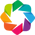

In [264]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Getting the data

In [265]:
# Defining global constants for the instagram extract

# Note: These things may change without a warning...

# Instagram base url preffix
tagurl_prefix = 'https://www.instagram.com/explore/tags/'

# suffix to append to tag request url to retrieve data in JSON format
tagurl_suffix = '/?__a=1'

# suffix to end cursor when requesting posts by tag
tagurl_endcursor = '&max_id='

# a generic media post preffix (concat with media shortcode to view)
posturl_prefix = 'https://www.instagram.com/p/'

# target initial tags (we will run this with only one tag but the code can take multiple - just extend the list)
tags = ['machinelearning']

In [266]:
# urls to initial tags using the above url-components
queries = [ tagurl_prefix + tag + tagurl_suffix for tag in tags ]

The response structure of this Insta endpoint is not really straightforward. You can read more about it in the original post.
The data is most likely composed on request by some large-scale graph database at returned. Instagram obviously assumes that the receiving site is a browser exploring public posts.

We also don't get all posts for some hashtag right away but a "page" ~25 posts.

To receive further posts, we need to pass a new requests specifying "our position" by providing an end_cursor.

This **end cursor** can be found in

```
response['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
```

#### Some thoughts on JSON

This brings us to JSON. Think of JSON objects as of combinations of dictionaries and lists that can contain most Python objects (e.g. lists, dictionaries, tuples, strings, ints etc.) that can be represented as text. Once parsed you can operate JSON objects just as any other dictionary or list in Python.
More about JSON - here:

In [267]:
edges = []
for q in queries:    
    for i in range(10): # how many iterations/deepth ?
        r = rq.get(q).json()
        end_cursor = r['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
        edges.extend(r['graphql']['hashtag']['edge_hashtag_to_media']['edges'])
        print(i)
        q = q + tagurl_endcursor + end_cursor

0
1
2
3
4
5
6
7
8
9


### Bringing the collected data into useful format...

In the next step we will take the rich raw posts data and extract only the information that we need for our analysis. We will just cut out owner-id (account that posted), a shortcode that we can use to identify the post and get more data on it in future if needed, and the text including the hashtags.

To make things more compact we not only extract the raw data but we also preprocess a bit.

The hashtags are incorporated within the post-text. Therefore, we pass the text of each post through a tokenizer, that identifies individual words and elements (such as emoji). We use the tweet-tokenizer from the NLTK library, which is made for working with social media data.

```
  tokens = tknzr.tokenize(text)
  tags = [x.strip('#') for x in tokens if x.startswith('#')]
```

The first line turns the text of the post in a list of tokens (words & co.). The second line picks out only the elements that start with a "#" and strips the "#" when adding them to a list.

Then we construct a dictionary with these values and append it to a list.

This gives us a list of dicitonaries - something that we can pass to Pandas to get a dataframe we can work with.

In [268]:
post_dicts = [] #empty list

for post in edges: #iterate all raw posts

    if post['node']['edge_media_to_caption']['edges'] == []: # hop to the next if no text in the post
        continue

    post_dict = {} # empty dictionary
    id_owner = post['node']['owner']['id'] # pick out user-id
    shortcode = post['node']['shortcode'] # pick out short post identifier
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text'] # pick out post text

    # Pick hashtags from text
    tokens = tknzr.tokenize(text)
    tags = [x.strip('#') for x in tokens if x.startswith('#')]

    # fill in dictionary with values
    post_dict['id_owner'] = id_owner
    post_dict['shortcode'] = shortcode
    post_dict['tags'] = tags
    post_dict['text'] = text

    post_dicts.append(post_dict) #append the dictionary to a list of post-dictionaries

In [269]:
# Create DF
posts_df = pd.DataFrame(post_dicts)

# Remove hashtags that are not a hashtag (emptyspace & mistakes)
posts_df['tags'] = posts_df['tags'].map(lambda t: [x for x in t if x.isalnum()])

# Kick out posts with 0 hashtags
posts_df = posts_df[posts_df['tags'].map(len) != 0]

### Simple stats

In [270]:
# People with most posts (no names though)
posts_df['id_owner'].value_counts()

15994596926    9
36795729641    6
203428593      6
32056941072    6
44541790684    5
              ..
3001006101     1
44104312674    1
16268287780    1
8589925696     1
44571747447    1
Name: id_owner, Length: 518, dtype: int64

### Creating a graph

In [271]:
# Create empty undirected Graph
G = nx.Graph()

We will construct the graph from hashtag combinations of each post. We will use `itertools.combinations` for that. Given a list of n objects this will create all possible unique combinations of size k (which we set to 2). Note, that we can build up the Graph sequentially. An edgelist contains all data we need.

In [272]:
# Create the graph
for i in posts_df['tags']:
    G.add_edges_from(list(itertools.combinations(i,2)))

### Preprocessing the Graph

It can be a good idea to filter the Graph before analysing. For instance, we can remove all hashtags with low degree-centrality. This can be interpreted as - kicking out made up hashtags or extremely underused ones. We will calculate a percentile threshold and exclude everything under it.

In [273]:
# Calculating degree centrality for the Graph
degree_centrality = nx.degree_centrality(G)

In [274]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 20)

In [275]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

### Analysing the Graph

Now we are going to calculate some network indicators and once done, we will export a DataFrame analyse them further.

In [276]:
# Recalculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [277]:
# Same for Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

In [278]:
# Same for community detection
communities = community.best_partition(G, resolution = 1)
nx.set_node_attributes(G, communities, 'community')

In [279]:
graph_df = pd.DataFrame(dict(G.nodes(data=True))).T

In [280]:
graph_df['community'].value_counts(normalize=True)

2.0     0.205128
4.0     0.114035
3.0     0.113360
8.0     0.099528
1.0     0.067139
0.0     0.063765
9.0     0.057018
10.0    0.048246
6.0     0.042848
13.0    0.038462
7.0     0.037112
11.0    0.029690
14.0    0.026653
12.0    0.025978
5.0     0.021592
15.0    0.009447
Name: community, dtype: float64

In [281]:
# Find the 5 most popular hashtags for each identified community
tag_per_com = graph_df.groupby('community')['degree'].nlargest(5)

In [282]:
tag_per_com[0]

artificialintelligence    0.496794
ai                        0.344583
startup                   0.088424
tecnologia                0.025650
arduinoproject            0.018562
Name: degree, dtype: float64

### Bipartite graph between users and hashtags

Can we identify communities of users given their usage of hashtags?

In [283]:
# Create a new graph
B = nx.Graph()

In [284]:
# we will take the same data
posts_df.head()

id_owner    shortcode  \
0   4066335310  CIVrmZ8gSNd   
1   1992643138  CIVrl18BAMA   
2  10029288171  CIVrfe6pef3   
3  35834464321  CIVralQg0ku   
4  44884230255  CIVraQ_p2dW   

                                                tags  \
0  [artificialintelligence, data, nocode, datasci...   
1  [Kotlin, Exactpro, DevMeetup, SoftwareDevelopm...   
2  [programmer, programming, coding, developer, c...   
3  [machinelearning, artificialintelligence, ai, ...   
4  [programmer, programming, coding, developer, c...   

                                                text  
0  We are honored to be shortlisted on the 2021 H...  
1  (Eng below) 🚀Крупномасштабные проекты\n👨‍💻Боль...  
2  Check out our Geek Tee's collection.\nLink in ...  
3  😂🤟💯\n.\n.\n.\n.\n.\n\n.\n.\n.\n.\n.\n.\n#machi...  
4  Follow @geekygiant_off and Tag Friends.\n.\n.\...

In [285]:
# We need to specify the nodes for level 0 - this will be our users
B.add_nodes_from(list(set(posts_df.id_owner)), bipartite=0)

In [286]:
# Then we need to add hashtags nodes as level 1 nodes
B.add_nodes_from(list(set(itertools.chain(*posts_df.tags))), bipartite=1)

In [287]:
# This quick loop will generate edges between users and hashtags
# Every time someone mentions a #hashtag, a link is created

bi_edges = []
for i in posts_df[['id_owner','tags']].iterrows(): # we do this row-by-row since each row is a post
    id_owner = i[1]['id_owner']
    for j in i[1]['tags']:
        bi_edges.append((id_owner, j)) # edges are appended to a list as a tuple (id_owner, hashtag)

In [288]:
# Let's add the edges to our graph
B.add_edges_from(bi_edges)

In the next step we will project the graph onto the account-level. For this we need to get the nodesets of the 0 level. We also calculate the level 1 level (just because)

In [289]:
# Extract a set of nodes with level 0
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}

# the remaining nodes are then level 1
bottom_nodes = set(B) - top_nodes

In [290]:
# Let's project this graph using a weighted projection
G_proj = bipartite.weighted_projected_graph(B, top_nodes)

In [291]:
# Again, we can identify communities
bi_communities = community.best_partition(G_proj, resolution = 1)
nx.set_node_attributes(G_proj, bi_communities, 'community')

In [292]:
# Calculate eigenvector centrality and set it as an attribute
bi_eigenvector = nx.eigenvector_centrality(G_proj)
nx.set_node_attributes(G_proj, bi_eigenvector, 'eigenvector_centrality')

In [293]:
# Create a new attribute "activity" - or propensity to spam
nx.set_node_attributes(G_proj, dict(posts_df.id_owner.value_counts()), 'activity' )

In [294]:
# Do spammers connect more in terms of spamming about the same stuff?
print(nx.numeric_assortativity_coefficient(G_proj,'activity'))

-0.001884804648514703


In [295]:
graph_proj_df = pd.DataFrame(dict(G_proj.nodes(data=True))).T

In [296]:
graph_proj_df.head()

bipartite  community  eigenvector_centrality  activity
15236995216        0.0        0.0                0.046483       1.0
6742694456         0.0        0.0                0.046690       1.0
44563240318        0.0        1.0                0.046239       2.0
18040144869        0.0        1.0                0.046659       5.0
10029288171        0.0        1.0                0.046659       1.0

In [297]:
# Find the 5 most central for each identified community
user_per_com = graph_proj_df.groupby('community')['eigenvector_centrality'].nlargest(5)

In [298]:
user_per_com

community             
0.0        22338852357    4.699913e-02
           5721060572     4.699865e-02
           12609639580    4.699832e-02
           9139319129     4.698429e-02
           6139941103     4.695515e-02
1.0        41941528945    4.694300e-02
           7437159874     4.681904e-02
           34594093267    4.681904e-02
           44407201585    4.681904e-02
           5439328910     4.681904e-02
2.0        9483662487     4.686417e-02
           28157703497    3.119619e-02
           12633770687    3.059516e-02
           2047034236     2.967398e-02
           44539060041    2.685717e-02
3.0        8690405702     4.688792e-18
4.0        31858361276    4.688792e-18
5.0        195258102      4.688792e-18
Name: eigenvector_centrality, dtype: float64

### The assignment

Basically, try to repeat the exercise on your own with a term of your choice. 

1. Just run the code from before, where you replace 'machinelearning' with whatever discussion you are interested to map.
2. Create the query link as in the notebook.
3. Since the instaloader is not working at the moment (seems to be blocked), you have to click on the query link to get the output in your web-browser. C&P it then, and save it in a text file (something like the text editor. that saves unformatted text.)
4. Now you can analyse the  instagram network.

*I skip this exercise*